# Task
Классифицировать писателей по тексту

Классы:
- Стругацкие
- Рэй Брэдберри
- Макс Фрай
- О. Генри
- Клиффорд_Саймак
- Булгаков

In [ ]:
from google.colab import  files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline 
#.....................................................................................................................................
from tensorflow.keras import utils
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
#.....................................................................................................................................1
from sklearn.preprocessing import LabelEncoder        # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split  # Для разделения выборки на тестовую и обучающую
from google.colab import drive                        # Для работы с Google Drive
import time                                           # Импортируем библиотеку time

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -R /content/texts
!unzip -q '/content/drive/MyDrive/Базы/Тексты писателей.zip' -d /content/texts

rm: cannot remove '/content/texts': No such file or directory


# Data Parsing

In [ ]:
def readf(path_file):
  file = open(path_file,'r')
  my_texts = file.read()
  my_texts = my_texts.replace('\n',' ')

  return my_texts

In [ ]:
file_names = os.listdir('/content/texts/Тексты писателей')

namas2 = []
clas_names = []
for i in file_names:
  b = ''
  for j in i:
    if b in namas2:
      break          
    if j != ')':
      b = b + j 
    else:
      namas2.append(b)
      break

for i in namas2:
  g = i.replace("(",'')
  clas_names.append(g) 

print(clas_names)
n_clas = len(clas_names)

['Рэй Брэдберри', 'О. Генри', 'Клиффорд_Саймак', 'Макс Фрай', 'Булгаков', 'Стругацкие']


In [ ]:
x_train = []
x_test = []

In [ ]:
x_train = []
x_test = []

for i in clas_names:
  for j in file_names:
    if i in j:
      if 'Обучающая' in j:
        x_train.append(readf('/content/texts/Тексты писателей/' + j))
        print(j, ' '*(40 - len(j)), '- в обучающей')
      if 'Тестовая' in j:
        x_test.append(readf('/content/texts/Тексты писателей/' + j))
        print(j, ' '*(40 - len(j)), '- в тестовой')

(Рэй Брэдберри) Тестовая_8 вместе.txt     - в тестовой
(Рэй Брэдберри) Обучающая_22 вместе.txt   - в обучающей
(О. Генри) Обучающая_50 вместе.txt        - в обучающей
(О. Генри) Тестовая_20 вместе.txt         - в тестовой
(Клиффорд_Саймак) Тестовая_2 вместе.txt   - в тестовой
(Клиффорд_Саймак) Обучающая_5 вместе.txt  - в обучающей
(Макс Фрай) Тестовая_2 вместе.txt         - в тестовой
(Макс Фрай) Обучающая_5 вместе.txt        - в обучающей
(Булгаков) Тестовая_2 вместе.txt          - в тестовой
(Булгаков) Обучающая_5 вместе.txt         - в обучающей
(Стругацкие) Обучающая_5 вместе.txt       - в обучающей
(Стругацкие) Тестовая_2 вместе.txt        - в тестовой


In [ ]:
all = 0
for i in x_train:
  all += len(i)
print(all, '- всего символов') 

11553605 - всего символов


In [ ]:
len(x_train)

6

In [ ]:
x_train[0]

'\ufeff451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бумагу, пиши поперёк.  Хуан Рамон Хименес   Часть 1  ОЧАГ И САЛАМАНДРА   Жечь было наслаждением. Какое-то особое наслаждение видеть, как огонь пожирает вещи, как они чернеют и меняются. Медный наконечник брандспойта зажат в кулаках, громадный питон изрыгает на мир ядовитую струю керосина, кровь стучит в висках, а руки кажутся руками диковинного дирижёра, исполняющего симфонию огня и разрушения, превращая в пепел изорванные, обуглившиеся страницы истории. Символический шлем, украшенный цифрой 451, низко надвинут на лоб, глаза сверкают оранжевым пламенем при мысли о том, что должно сейчас произойти: он нажимает воспламенитель – и огонь жадно бросается на дом, окрашивая вечернее небо в багрово-жёлто-чёрные тона. Он шагает в рое огненно-красных светляков, и больше всего ему хочется сделать сейчас то, чем он так часто забавлялся в детстве,\xa0– сунуть в огонь прутик с леденцом, пока книги, как голуби, ше

#Preprocessing

## Tokenization

In [ ]:
max_count_words = 50000
tokenizer = Tokenizer(max_count_words,'!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',oov_token= 'unknown', lower=True)

tokenizer.fit_on_texts(x_train)
items = list(tokenizer.word_index.items())

In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
secuence_tr = tokenizer.texts_to_sequences(x_train) # Обучающие тесты в индексы
secuence_te = tokenizer.texts_to_sequences(x_test)  # Проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", x_train[1][100:150])
print("Он же в виде последовательности индексов: ", secuence_tr[1][100:110], '\n')

print("Взглянем на фрагмент проверочного текста:")
print("В виде оригинального текста:              ", x_test[1][100:150])
print("Он же в виде последовательности индексов: ", secuence_te[1][100:110], '\n')

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               но снится какая-то дичь! – сердито сказал я Джуффи
Он же в виде последовательности индексов:  [4, 3626, 47, 350, 6, 188, 41, 4, 14548, 2] 

Взглянем на фрагмент проверочного текста:
В виде оригинального текста:               т на закономерный вопрос: «Как меня сюда занесло?»
Он же в виде последовательности индексов:  [47, 3, 600, 25, 199, 10, 104, 1974, 34, 6] 



In [ ]:
def get_set_ind(indexes, len_set, step):
  samples = []
  n_ind = len(indexes)
  st_ind = 0

  while (st_ind + len_set) <= n_ind:
    samples.append(indexes[st_ind:st_ind+len_set])
    st_ind += step

  return samples

In [ ]:
def get_set_ind_in_one(indexes, len_set, step):
  sample1 = []
  num_ind = len(indexes)
  for i in indexes:                                                   # подсовываем список типа [[3 3434 44][343 353 4][4 545 777].....]
    sample1.append(get_set_ind(i, len_set, step))                     # получаем [[[3 3434][3434 44]][[343 353][353 4]]........]

  sample_x = []
  for i in sample1:
    for j in i:
      sample_x.append(j)                                              #разбиваем скобки и получаем [[3 3434][3434 44][343 353][353 4]....]

  sample_y = []
  for i in range(num_ind):                                            # перебираем классы 0 - 5
    xi = sample1[i]                                                   # спускаемся на уровень каскада примеров определенного писателя
    for j in xi:                                                      # каждый пример этого каскада
      sample_y.append(utils.to_categorical(i,num_ind))                # проходя через categorical добавляется в sample_y

  sample_x = np.array(sample_x)
  sample_y = np.array(sample_y)

  return sample_x,sample_y

In [ ]:
len_set = 1000
step = 100
xTrain=0
yTrain=0
xTest=0
yTest=0

**Обычная токенизация (для Embedding).**

In [ ]:
cur_time = time.time() # Засекаем текущее время

xTrain, yTrain = get_set_ind_in_one(secuence_tr, len_set, step) #извлекаем обучающую выборку
xTest, yTest = get_set_ind_in_one(secuence_te, len_set, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(17640, 1000)
(17640, 6)
(6686, 1000)
(6686, 6)
Время обработки: 2.41c


**Bag Of Word токенизация.**

In [ ]:
cur_time = time.time() # Засекаем текущее время
# Преобразовываем в Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist()) #П одаем xTrain в виде списка
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist()) # Подаем xTest в виде списка

print(xTrain01.shape)       # Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) # Фрагмент набора слов в виде Bag of Words
print('Время обработки: ', round(time.time() - cur_time, 2), 'c', sep='')

(17640, 20000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1.]
Время обработки: 10.72c


## Creating testing function

**Создание функций для проверки модели.**

In [ ]:
# РАЗБИВАЕМ ТЕСТОВУЮ ВЫБОРКУ С ОБЩИМ КОЛИЧ. ПРИМЕРОВ 6686, НА 6 КЛАССОВ (1318,1077...), ЧТО В СУММЕ 6686
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #Задаем количество классов
  xTest6Classes01 = []               #Здесь будет список из всех классов, каждый размером "кол-во окон в тексте * 20000 (при maxWordsCount=20000)"
  xTest6Classes = []                 #Здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #Для каждого тестового текста из последовательности индексов
    sample = (get_set_ind(wI, xLen, step)) #Тестовая выборка размером "кол-во окон*длину окна"(например, 420*1000)
    xTest6Classes.append(sample)              # Добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #Трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #И добавляется к нашему списку, 
  xTest6Classes = np.array(xTest6Classes)                     #И добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

In [ ]:
xTest6Classes01, x2 = createTestMultiClasses(secuence_te, len_set, step) #Преобразование тестовой выборки

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
print(len(xTest6Classes01[4]),len(x2[4]))

1318 1318


In [ ]:
# Распознаём тестовую выборку и выводим результаты
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  totalSumRec = 0 # Сумма всех правильных ответов
  
  #Проходим по всем классам
  for i in range(6):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(6):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal) #Определяем, какой класс в итоге за какой был распознан
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "Это НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = "Это ПРАВИЛЬНЫЙ ответ!"
    str1 = 'Класс: ' + clas_names[i] + " " * (20 - len(clas_names[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + clas_names[recognizedClass]
    print(str1, " " * (70-len(str1)), isRecognized, sep='')
  
  #Выводим средний процент распознавания по всем классам вместе
  print()
  sumCount = 0
  for i in range(6):
    sumCount += len(xTest[i])
  print("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%", sep='')

  print()
  
  return totalSumRec/sumCount

# Modelling

In [ ]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
count_acc = []

In [ ]:
def Creat_Mod():
  model01 = Sequential()
  model01.add(Dense(16, input_dim= max_count_words, activation="relu"))
  model01.add(Dropout(0.1)) 
  model01.add(BatchNormalization())
  model01.add(Dense(6, activation='softmax'))

  model01.compile(optimizer=Adam(0.0001), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01

In [ ]:
def Creat_Mod_Em():
#Создаём сеть с Embedding слоем
  modelE = Sequential()
  modelE.add(Embedding(max_count_words, 200, input_length=len_set))
  modelE.add(SpatialDropout1D(0.2))
  modelE.add(Flatten())
  modelE.add(BatchNormalization())
  modelE.add(Dense(100, activation="relu"))
  modelE.add(Dropout(0.2))
  modelE.add(BatchNormalization())
  modelE.add(Dense(6, activation='sigmoid'))

  modelE.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return modelE

In [ ]:
count_acc

[0.8858809471130371,
 0.885432243347168,
 0.879300057888031,
 0.7874663472175598,
 0.8073586821556091,
 0.8638947010040283,
 0.8466945886611938,
 0.8513311147689819]

## maxWordsCount = 100

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 14,214
Trainable params: 13,958
Non-trainable params: 256
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 1s 4ms/step - loss: 2.1354 - accuracy: 0.2040 - val_loss: 1.7280 - val_accuracy: 0.3009
Epoch 2/30
138/138 [==============================] - 1s 4ms/step - loss: 1.6609 - accuracy: 0.3571 - va

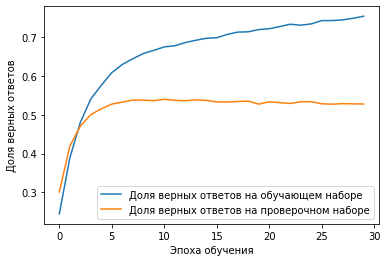

In [ ]:
model01 = Creat_Mod()

model01.summary()

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:

pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            49% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           72% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       26% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     50% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            59% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          43% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 52%



## maxWordsCount = 1000

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               128128    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 129,414
Trainable params: 129,158
Non-trainable params: 256
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 1s 5ms/step - loss: 1.6510 - accuracy: 0.3951 - val_loss: 1.2150 - val_accuracy: 0.5446
Epoch 2/30
138/138 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.8476 - 

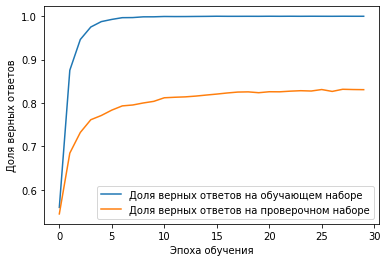

In [ ]:
model02 = Creat_Mod()

model02.summary()

history = model02.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred = recognizeMultiClass(model02, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            90% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           88% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       83% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     74% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            79% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          78% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 83%



## maxWordsCount = 10000

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 774       
Total params: 1,281,414
Trainable params: 1,281,158
Non-trainable params: 256
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 8ms/step - loss: 0.8455 - accuracy: 0.7162 - val_loss: 0.9908 - val_accuracy: 0.7595
Epoch 2/30
138/138 [==============================] - 1s 6ms/step - loss: 0.0332 - accuracy: 0.999

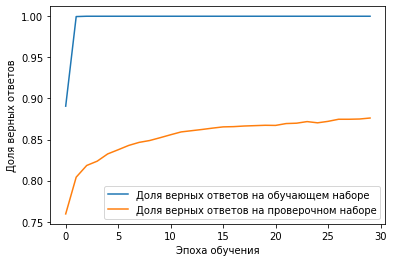

In [ ]:
model03 = Creat_Mod()

model03.summary()

history = model03.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred = recognizeMultiClass(model03, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            99% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           86% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       93% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     73% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            81% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          90% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%



## maxWordsCount = 50000, Ошибка!, не хватает ОЗУ колаба, даже при использовании GPU

## количество нейронов в слоях = 16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                320016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 4s 13ms/step - loss: 1.1631 - accuracy: 0.6045 - val_loss: 1.2310 - val_accuracy: 0.7124
Epoch 2/30
138/138 [==============================] - 1s 8ms/step - loss: 0.2761 - accuracy: 0.9766 - va

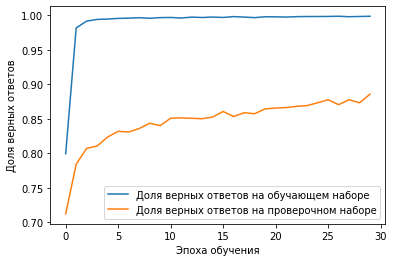

In [ ]:
model04 = Creat_Mod()

model04.summary()

history = model04.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred = recognizeMultiClass(model04, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            90% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           89% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       96% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     91% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            77% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          88% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%



## количество нейронов в слоях = 64

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1280064   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,280,710
Trainable params: 1,280,582
Non-trainable params: 128
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 11ms/step - loss: 0.8931 - accuracy: 0.7049 - val_loss: 1.1055 - val_accuracy: 0.7641
Epoch 2/30
138/138 [==============================] - 1s 8ms/step - loss: 0.0684 - accuracy: 0.99

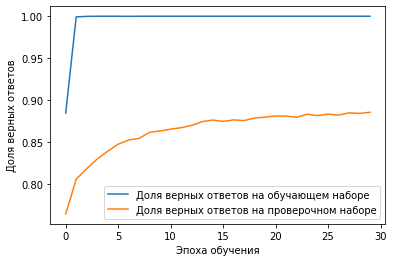

In [ ]:
model05 = Creat_Mod()

model05.summary()

history = model05.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
pred = recognizeMultiClass(model05, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            95% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           87% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       96% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     79% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            80% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          90% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 88%



## количество нейронов в слоях = 128

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 2,561,414
Trainable params: 2,561,158
Non-trainable params: 256
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 11ms/step - loss: 0.7859 - accuracy: 0.7366 - val_loss: 1.0302 - val_accuracy: 0.7849
Epoch 2/30
138/138 [==============================] - 1s 8ms/step - loss: 0.0305 - accuracy: 0.99

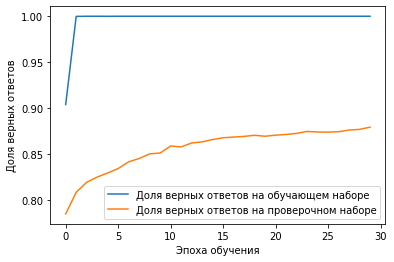

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            94% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           86% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       96% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     78% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            81% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          89% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%

0.8793000299132516


In [ ]:
model06 = Creat_Mod()

model06.summary()

history = model06.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model06, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## количество Dense слоев = 2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                320016    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 102       
Total params: 320,454
Trainable params: 320,422
Non-trainable params: 32
_______________________________________________

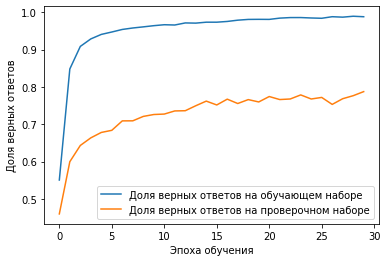

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            87% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           85% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       98% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     83% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            46% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          74% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 78%

0.7874663475919832


In [ ]:
model07 = Creat_Mod()

model07.summary()

history = model07.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model07, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## количество Dense слоев = 3

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                320016    
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)               

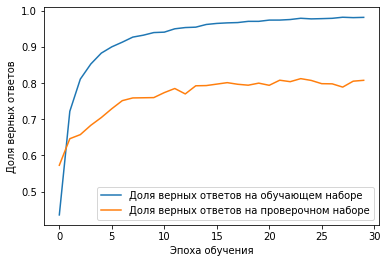

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            92% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           94% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       84% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     67% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            69% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          64% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 80%

0.8073586598863296


In [ ]:
model08 = Creat_Mod()

model08.summary()

history = model08.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model08, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## активационная функция = sigmoid

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                320016    
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 10ms/step - loss: 1.6223 - accuracy: 0.4082 - val_loss: 1.4768 - val_accuracy: 0.7788
Epoch 2/30
138/138 [==============================] - 1s 8ms/step - loss: 0.5215 - accuracy: 0.8745 - 

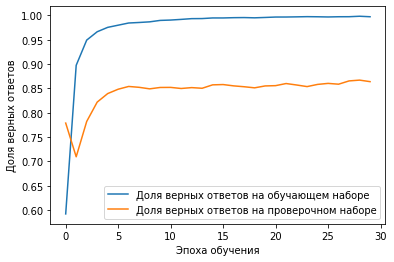

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            81% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           79% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       98% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     98% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            78% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          89% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 86%

0.863894705354472


In [ ]:
model09 = Creat_Mod()

model09.summary()

history = model09.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model09, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## активационная функция = tanh

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                320016    
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 11ms/step - loss: 1.0266 - accuracy: 0.6699 - val_loss: 1.1972 - val_accuracy: 0.7112
Epoch 2/30
138/138 [==============================] - 1s 9ms/step - loss: 0.2014 - accuracy: 0.9984 - 

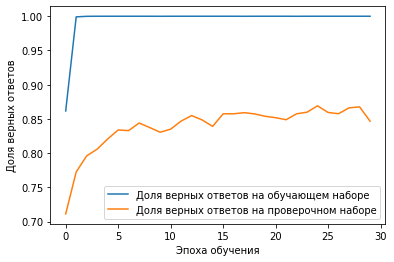

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            98% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           82% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       93% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     71% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            70% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          93% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 84%

0.8466945857014657


In [ ]:
model10 = Creat_Mod()

model10.summary()

history = model10.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model10, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## активационная функция = elu

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                320016    
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 12ms/step - loss: 0.8861 - accuracy: 0.7148 - val_loss: 1.1877 - val_accuracy: 0.6861
Epoch 2/30
138/138 [==============================] - 1s 9ms/step - loss: 0.1234 - accuracy: 0.9993 - 

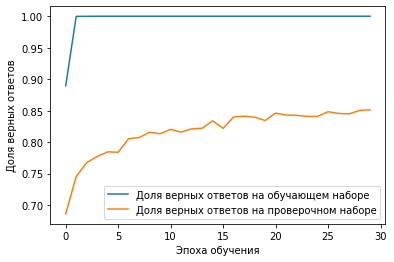

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            96% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           82% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       93% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     71% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            77% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          89% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 85%

0.8513311396948848


In [ ]:
model11 = Creat_Mod()

model11.summary()

history = model11.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model11, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## активационная функция = selu




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                320016    
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16)                64        
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 12ms/step - loss: 0.9920 - accuracy: 0.6757 - val_loss: 1.0745 - val_accuracy: 0.7275
Epoch 2/30
138/138 [==============================] - 1s 9ms/step - loss: 0.1793 - accuracy: 0.9988 - 

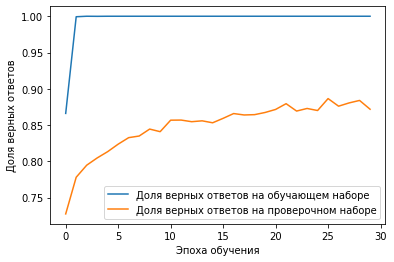

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            90% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           85% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       98% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     81% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            79% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          86% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 87%

0.8718217170206402


In [ ]:
model12 = Creat_Mod()

model12.summary()

history = model12.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model12, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## активационная функция = relu




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                320016    
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 102       
Total params: 320,182
Trainable params: 320,150
Non-trainable params: 32
_________________________________________________________________
Epoch 1/30
138/138 [==============================] - 2s 11ms/step - loss: 1.1520 - accuracy: 0.6017 - val_loss: 1.2503 - val_accuracy: 0.7082
Epoch 2/30
138/138 [==============================] - 2s 11ms/step - loss: 0.2798 - accuracy: 0.9872 -

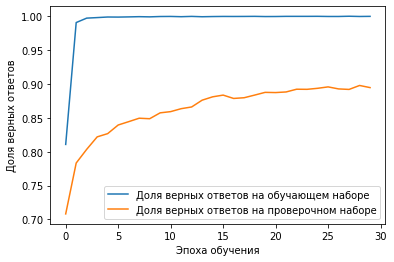

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри            93% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           88% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       96% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     78% сеть отнесла к классу Клиффорд_Саймак  Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            88% сеть отнесла к классу Булгаков         Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          87% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 89%

0.8945557882141789


In [ ]:
model13 = Creat_Mod()

model13.summary()

history = model13.fit(xTrain01, 
                      yTrain, 
                      epochs=30,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model13, xTest6Classes01, "Тексты 01 + Dense")

print(pred)

## Embedding пространство = 10

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 10)          500000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1000, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10000)             40000     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)             

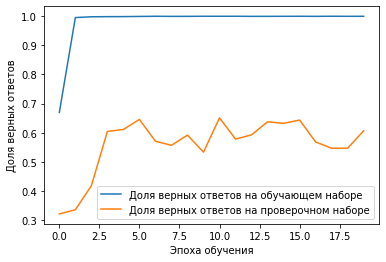

НЕЙРОНКА:  Embedding + Dense

Класс: О. Генри            64% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           71% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       49% сеть отнесла к классу Рэй Брэдберри    Это ПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     17% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            25% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          78% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 54%

0.5456177086449298


In [ ]:
model14 = Creat_Mod_Em()

model14.summary()

history = model14.fit(xTrain, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model14, x2, "Embedding + Dense")

print(pred)

## Embedding пространство = 50

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 50)          2500000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 1000, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50000)             0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 50000)             200000    
_________________________________________________________________
dense_27 (Dense)             (None, 100)               5000100   
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 100)             

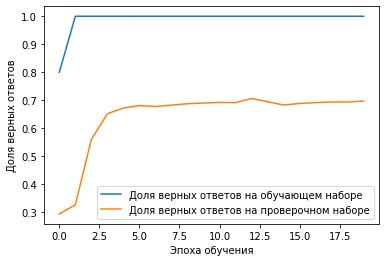

НЕЙРОНКА:  Embedding + Dense

Класс: О. Генри            79% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           70% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       20% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     14% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            18% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          97% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 51%

0.5140592282381095


In [ ]:
model15 = Creat_Mod_Em()

model15.summary()

history = model15.fit(xTrain, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model15, x2, "Embedding + Dense")

print(pred)

## Embedding пространство = 200

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 200)         10000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 1000, 200)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200000)            0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 200000)            800000    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               20000100  
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 100)             

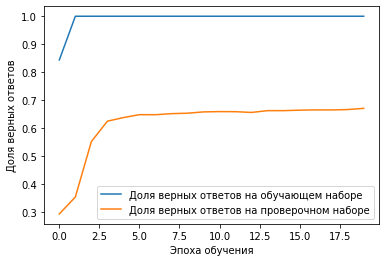

НЕЙРОНКА:  Embedding + Dense

Класс: О. Генри            80% сеть отнесла к классу О. Генри         Это ПРАВИЛЬНЫЙ ответ!
Класс: Макс Фрай           68% сеть отнесла к классу Макс Фрай        Это ПРАВИЛЬНЫЙ ответ!
Класс: Рэй Брэдберри       11% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Клиффорд_Саймак     9% сеть отнесла к классу Стругацкие        Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Булгаков            11% сеть отнесла к классу Стругацкие       Это НЕПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие          96% сеть отнесла к классу Стругацкие       Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 47%

0.4702363146874065


In [ ]:
model16 = Creat_Mod_Em()

model16.summary()

history = model16.fit(xTrain, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest, yTest))

count_acc.append(history.history['val_accuracy'][-1])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model16, x2, "Embedding + Dense")

print(pred)

# Conclusions

In [ ]:
time_epoch = [0.003, 0.004, 1.006, '-', 1.008, 1.008, 1.009, 1.009, 1.009, 1.008, 1.009, 1.009, 1.01, 1.01, 2.016, 7.051, 25.184]

In [ ]:
print(count_acc)

[0.527867321014257, 0.83084832151455, 0.87624862156452, 'НЕ достаточно ОЗУ', 0.8858809471130371, 0.885432243347168, 0.879300057888031, 0.7874663472175598, 0.8073586821556091, 0.8638947010040283, 0.8466945886611938, 0.8513311147689819, 0.8718217015266418, 0.8945558071136475, 0.60679030418396, 0.696978747844696, 0.6708046793937683]


In [ ]:
data = pd.DataFrame({'Испытание': ['maxWordsCount = 100',
                                   'maxWordsCount = 1000',
                                   'maxWordsCount = 10000',
                                   'maxWordsCount = 50000',
                                   'количество нейронов в слоях = 16',
                                   'количество нейронов в слоях = 64',
                                   'количество нейронов в слоях = 128',
                                   'количество Dense слоев = 2',
                                   'количество Dense слоев = 3',
                                   'активационная функция = sigmoid',
                                   'активационная функция = tanh',
                                   'активационная функция = elu',
                                   'активационная функция = selu',
                                   'активационная функция = relu',
                                   'Embedding пространство = 10',
                                   'Embedding пространство = 50',
                                   'Embedding пространство = 200',
                                   ], 'Точность сети': count_acc,
                                      'Длительность эпохи [сек]':time_epoch})
data

,Испытание,Точность сети,Длительность эпохи [сек]
0,maxWordsCount = 100,0.527867,0.003
1,maxWordsCount = 1000,0.830848,0.004
2,maxWordsCount = 10000,0.876249,1.006
3,maxWordsCount = 50000,НЕ достаточно ОЗУ,-
4,количество нейронов в слоях = 16,0.885881,1.008
5,количество нейронов в слоях = 64,0.885432,1.008
6,количество нейронов в слоях = 128,0.8793,1.009
7,количество Dense слоев = 2,0.787466,1.009
8,количество Dense слоев = 3,0.807359,1.009
9,активационная функция = sigmoid,0.863895,1.008


In [ ]:
'''
1. Бедность словаря ведёт к падению точности, но чем он больше, тем дольше обучается модель и больше требуется ОЗУ
2. В данной задаче увеличение кол-ва нейронов в слое НЕ привело к повышению точности НС
3. В данной задаче увеличение кол-ва слоев НЕ привело к увеличению точности модели, т.к. с одним слоем Acc = 0.87
4. Лучше всех в скрытых слоях себя показала функция активации - RELU
5. Увеличение Embedding пространства ведёт к некоторому повышению точности (и то, только до определенного момента), однако
времени на обучение  сетки тратится несоизмеримо больше
'''